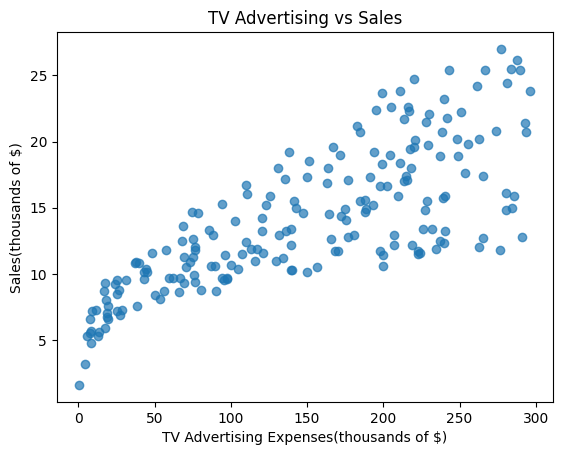

Correlation coefficient: 0.78
Linear Model: Sales = 7.03 + 0.05 * TV
R-squared: 0.61, p-value: 1.47e-42
95% CI for slope: [0.04, 0.05]
95% CI for intercept: [7.03, 7.03]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, t
import numpy as np

# Loading the dataset
data = pd.read_csv('Advertising.csv', index_col=0)

# Scatter Plot and Correlation
plt.scatter(data['TV'], data['sales'], alpha=0.7)
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising Expenses(thousands of $)')
plt.ylabel('Sales(thousands of $)')
plt.show()

correlation = data['TV'].corr(data['sales'])
print(f'Correlation coefficient: {correlation:.2f}')
# 0.78 indicates a strong positive linear relationship

# Linear Regression
# Hypotheses:
# H0: β1 = 0 (No relationship between TV expenses and sales)
# H1: β1 ≠ 0 (Significant relationship exists between TV expenses and sales)
slope, intercept, r_value, p_value, std_err = linregress(data['TV'], data['sales'])
print(f'Linear Model: Sales = {intercept:.2f} + {slope:.2f} * TV')
print(f'R-squared: {r_value**2:.2f}, p-value: {p_value:.2e}')
# Model: Sales = 7.03 + 0.05 * TV, R² = 0.61(sales variability), p-value < 0.001 (significant relationship).

# Confidence Intervals for Parameters
n = len(data)
df = n - 2
t_critical = t.ppf(1 - 0.025, df) #95% confidence (two-tailed),(0.025 each)
mean_x = np.mean(data['TV'])
Sxx = np.sum((data['TV'] - mean_x) ** 2)

# Calculating the margin of error for the slope using t_critical and std_err.
slope_margin = t_critical * std_err
intercept_std_err = std_err * np.sqrt(1 / n + mean_x**2 / Sxx)
intercept_margin = t_critical * intercept_std_err

print(f'95% CI for slope: [{slope - slope_margin:.2f}, {slope + slope_margin:.2f}]')
print(f'95% CI for intercept: [{intercept - intercept_margin:.2f}, {intercept + intercept_margin:.2f}]')
